In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/drive/MyDrive/Rural.pcap_Flow.csv')
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.8.100-41.110.43.15-52366-443-6,41.110.43.15,443,192.168.8.100,52366,6,05/02/2019 11:59:18 PM,163105,0,3,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
1,172.217.164.67-192.168.8.100-443-52381-6,192.168.8.100,52381,172.217.164.67,443,6,05/02/2019 11:59:12 PM,10629080,2,4,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
2,172.217.164.67-192.168.8.100-443-52381-6,192.168.8.100,52381,172.217.164.67,443,6,05/02/2019 11:59:23 PM,51641798,2,1,...,0,0.0,0.0,0.0,0.0,4.502330e+07,0.000000e+00,45023299.0,45023299.0,No Label
3,172.217.164.67-192.168.8.100-443-52381-6,192.168.8.100,52381,172.217.164.67,443,6,06/02/2019 12:00:15 AM,1803601,1,1,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
4,172.217.0.78-192.168.8.100-443-52385-6,192.168.8.100,52385,172.217.0.78,443,6,06/02/2019 12:00:15 AM,10329301,1,3,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646422,172.217.30.195-192.168.8.100-443-53302-6,192.168.8.100,53302,172.217.30.195,443,6,06/02/2019 12:49:59 AM,1683599,1,1,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
646423,172.217.18.238-192.168.8.100-443-53282-6,192.168.8.100,53282,172.217.18.238,443,6,06/02/2019 12:50:00 AM,2323688,1,1,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label
646424,134.221.96.0-0.0.0.32-0-0-0,134.221.96.0,0,0.0.0.32,0,0,06/02/2019 12:47:54 AM,99203417,6,1,...,0,0.0,0.0,0.0,0.0,1.653390e+07,7.136759e+06,25999904.0,5015998.0,No Label
646425,192.168.8.100-41.110.40.55-53281-443-6,192.168.8.100,53281,41.110.40.55,443,6,06/02/2019 12:50:00 AM,2406700,1,1,...,0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,No Label


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df.dropna()

In [ ]:
df= df.drop(['Flow ID' , 'Dst IP' , 'Timestamp' ,'Label'] , axis=1)

In [ ]:
df.rename({'Src IP':'Label'} , axis=1 , inplace=True)

In [ ]:
df['Label'] = ["DoS attack" if x=="192.168.0.8"
               else "DoS attack" if x=="192.168.0.6"
               else "DoS attack" if x=="192.168.0.7"
               else "Benign" for x in df['Label']]

In [ ]:
numeric_features = df.dtypes[df.dtypes!='object'].index
np.where(np.isinf(df[numeric_features]))

(array([5427, 5427]), array([16, 17]))

In [ ]:
df[numeric_features] = df[numeric_features].drop(df[numeric_features].index[[5427]])

In [ ]:
class_0 = df[df['Label'] == 'DoS attack']
class_1 =df[df['Label'] == 'Benign']

In [ ]:
class_count_2= 80000

In [ ]:
class_1_over = class_1.sample(class_count_2, replace=True)
df = pd.concat([class_1_over, class_0 ])

# print the number of class count
df['Label'].value_counts()

DoS attack    621888
Benign         80000
Name: Label, dtype: int64

In [ ]:
df['Label'].value_counts()

DoS attack    621888
Benign         80000
Name: Label, dtype: int64

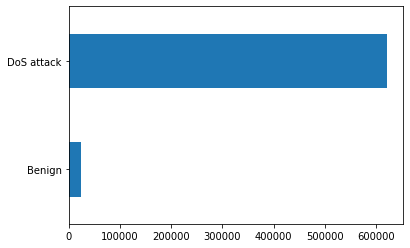

In [ ]:
df['Label'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [ ]:
x , y = df.loc[: , df.columns != 'Label'] , df['Label']
# Only select rows that have all finite entries
x = x[np.all(np.isfinite(x), axis=1)]
scaler = StandardScaler()
scaler.fit_transform(x)

array([[-1.67417578e+00,  4.01102125e+01, -1.17171332e+00, ...,
        -5.55539778e-01, -1.12743025e+00, -8.19369395e-01],
       [ 1.01834822e+00,  2.50669108e-01, -1.17171332e+00, ...,
        -5.55539778e-01, -1.12743025e+00, -8.19369395e-01],
       [ 1.01834822e+00,  2.50669108e-01, -1.17171332e+00, ...,
        -5.55539778e-01,  4.45665395e-01,  1.00896667e+00],
       ...,
       [-1.69714139e+00, -8.94071148e-02, -2.27590066e+00, ...,
        -2.14422720e-03, -2.19004245e-01, -6.15676413e-01],
       [ 1.06500523e+00,  2.50669108e-01, -1.17171332e+00, ...,
        -5.55539778e-01, -1.12743025e+00, -8.19369395e-01],
       [ 1.06640494e+00,  2.50669108e-01, -1.17171332e+00, ...,
        -5.55539778e-01, -1.12743025e+00, -8.19369395e-01]])

In [ ]:
x = x.apply(lambda x: (x*255))

In [ ]:
df0=df[df['Label']=='Benign'].drop(['Label'],axis=1)
df1=df[df['Label']=='DoS attack'].drop(['Label'],axis=1)

In [ ]:
# Generate 79*79 color images for class 0 (BENIGN)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path)

for i in range(0, len(df0)):
    count=count+1
    if count<=237:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [ ]:
# Generate 79*79 color images for class 1 (DoS attack)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path)

for i in range(0, len(df1)):
    count=count+1
    if count<=237:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(79,79,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

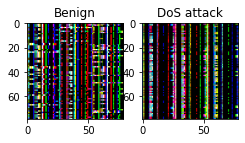

In [ ]:
# Read the images for each category
img1 = Image.open('./train/0/237.png')
img2 = Image.open('./train/1/237.png')

plt.figure(figsize=(10,10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Benign")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("DoS attack")
plt.show()  # display it

In [ ]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

2948


In [ ]:
#split a test set from the dataset, train/test size = 70%/30%
Numbers=len(allimgs)//3	#size of test set (30%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)

In [ ]:
# The size of test set
Numbers

982

In [ ]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [ ]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [ ]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [ ]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


In [ ]:
import os
from keras.preprocessing.image import  ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
import keras.callbacks as kcallbacks
import keras
#from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
#"categorical": 2D output (aka. list of numbers of length N), [0, 0, 1, 0], which is a one-hot encoding (only one number is 1/ "hot") representing the donkey. This is for mutually exclusive labels
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1966 images belonging to 2 classes.
Found 982 images belonging to 2 classes.


In [ ]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_accuracy = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_accuracy['batch'].append(logs.get('val_accuracy'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_accuracy['epoch'].append(logs.get('val_accuracy'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        #plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_accuracy[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.savefig('diagram.jpg')
        plt.show()

In [ ]:
history_this= LossHistory()

In [ ]:
def cnn_by_own(input_shape,num_class,epochs,savepath='./model_own.h5'):
    model = Sequential()
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=input_shape,padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    #model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='glorot_uniform'))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_class,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #train model
    earlyStopping=kcallbacks.EarlyStopping(monitor='val_accuracy', patience=8, verbose=1, mode='auto')
    saveBestModel = kcallbacks.ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='auto')
    hist=model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator),
        callbacks=[earlyStopping,saveBestModel,history_this],
    )

Epoch 1/10
 6/16 [==========>...................] - ETA: 5s - loss: 0.4941 - accuracy: 0.7852

16/16 [==============================] - ETA: 0s - loss: 0.4650 - accuracy: 0.8393
Epoch 1: val_accuracy improved from -inf to 0.89409, saving model to ./model_own.h5
16/16 [==============================] - 16s 855ms/step - loss: 0.4650 - accuracy: 0.8393 - val_loss: 0.3625 - val_accuracy: 0.8941
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8820
Epoch 2: val_accuracy did not improve from 0.89409
16/16 [==============================] - 13s 803ms/step - loss: 0.3616 - accuracy: 0.8820 - val_loss: 0.2613 - val_accuracy: 0.8941
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.2457 - accuracy: 0.8820
Epoch 3: val_accuracy did not improve from 0.89409
16/16 [==============================] - 13s 804ms/step - loss: 0.2457 - accuracy: 0.8820 - val_loss: 0.1976 - val_accuracy: 0.8941
Epoch 4/10
16/16 [==============================] - ETA: 0s - loss: 0.1699 - accuracy: 0.8820
Epoch 4: val_accuracy did not improve from 0.89409
16

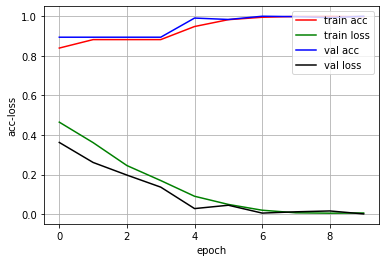

<function matplotlib.pyplot.show(*args, **kw)>

In [ ]:
cnn_by_own(input_shape=INPUT_SIZE,num_class=2,epochs=10)
history_this.loss_plot('epoch')
#history_this.loss_plot('batch')
plt.show

In [ ]:
#compute other parameters
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

In [ ]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 982 images belonging to 2 classes.


In [ ]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [ ]:
print(label)

{0: '0', 1: '1'}


In [ ]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

1 ./test_224/1/434825.png


In [ ]:
#load model 1: CNN
CNN_model=load_model('./model_own.h5')

1/1 [==============================] - 0s 314ms/step
Predicted result for the first image: 1
Confidence level: 0.9999645


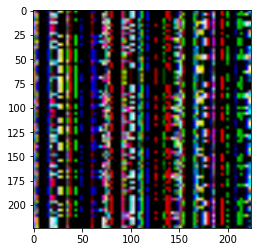

In [ ]:
#Single image prediction
import cv2
import matplotlib.pyplot as plt
test=cv2.imread(test_images[0])

img_show=test[:,:,[2,1,0]]
test=test/255.
test_shape=(1,)+test.shape
test=test.reshape(test_shape)

res=CNN_model.predict(test)

prob=res[0,np.argmax(res,axis=1)[0]]
res=label[np.argmax(res,axis=1)[0]]
print('Predicted result for the first image: %s'%res)
print('Confidence level: %s'%prob)
plt.imshow(img_show)
plt.show()

In [ ]:
%%time
import time
predict=[]
length=len(test_images)
t1 = time.time()
for i in range(length):
    inputimg=test_images[i]
    test_batch=[]
    thisimg=np.array(Image.open(inputimg))/255 #read all the images in validation set
    #print(thisimg)
    test_shape=(1,)+thisimg.shape
    thisimg=thisimg.reshape(test_shape)
    CNN_model_batch=CNN_model.predict(thisimg) #use master model to process the input image
    #generate result by model 1
    prob=CNN_model_batch[0,np.argmax(CNN_model_batch,axis=1)[0]]
    res=label[np.argmax(CNN_model_batch,axis=1)[0]]
    predict.append(res)

1/1 [==============================] - 0s 16ms/step
CPU times: user 48.5 s, sys: 2.43 s, total: 51 s
Wall time: 55.1 s


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc=accuracy_score(test_laels,predict)
pre=precision_score(test_laels,predict,average='weighted')
re=recall_score(test_laels,predict,average='weighted')
f1=f1_score(test_laels,predict,average='weighted')
print('CNN accuracy: %s'%acc)
print('precision: %s'%pre)
print('recall: %s'%re)
print('f1: %s'%f1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_laels, predict))
target_names = ['0', '1']
print(classification_report(test_laels, predict, target_names=target_names , digits=5))

CNN accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
[[108   0]
 [  0 874]]
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       108
           1    1.00000   1.00000   1.00000       874

    accuracy                        1.00000       982
   macro avg    1.00000   1.00000   1.00000       982
weighted avg    1.00000   1.00000   1.00000       982



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_laels, predict)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR : ',TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print('TNR : ',TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print('PPV : ',PPV)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR : ',FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR : ',FNR)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('ACC : ',ACC)

TPR :  [1. 1.]
TNR :  [1. 1.]
PPV :  [1. 1.]
FPR :  [0. 0.]
FNR :  [0. 0.]
ACC :  [1. 1.]
